In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_excel("Raisin_Dataset.xlsx")

label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4074 - loss: 0.6943 - val_accuracy: 0.5741 - val_loss: 0.6872
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6370 - loss: 0.6850 - val_accuracy: 0.7333 - val_loss: 0.6798
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6865 - loss: 0.6786 - val_accuracy: 0.7852 - val_loss: 0.6708
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.6671 - val_accuracy: 0.8148 - val_loss: 0.6582
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.6545 - val_accuracy: 0.8370 - val_loss: 0.6451
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8364 - loss: 0.6422 - val_accuracy: 0.8407 - val_loss: 0.6319
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8456 - loss: 0.6327 - val_accuracy: 0.8407 - val_loss: 0.6172
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.6185 - val_accuracy: 0.8481 - val_loss: 0.

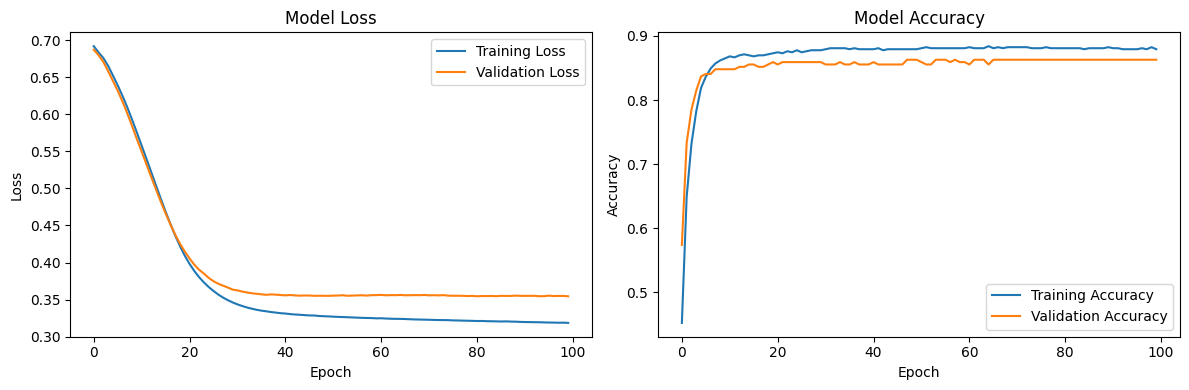

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       129
           1       0.88      0.86      0.87       141

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

Confusion Matrix:
 [[112  17]
 [ 20 121]]


In [38]:
from keras.layers import Input
from keras.models import Model

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

autoencoder1, encoder1 = build_autoencoder(X_train.shape[1], 64)
autoencoder1.fit(X_train, X_train, epochs=100, batch_size=16, shuffle=True)

X_train_encoded = encoder1.predict(X_train)
autoencoder2, encoder2 = build_autoencoder(64, 32)
autoencoder2.fit(X_train_encoded, X_train_encoded, epochs=100, batch_size=16, shuffle=True)

X_train_encoded = encoder2.predict(X_train_encoded)
autoencoder3, encoder3 = build_autoencoder(32, 16)
autoencoder3.fit(X_train_encoded, X_train_encoded, epochs=100, batch_size=16, shuffle=True)

model.layers[0].set_weights(autoencoder1.get_weights()[:2])
model.layers[1].set_weights(autoencoder2.get_weights()[:2])
model.layers[2].set_weights(autoencoder3.get_weights()[:2])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2007
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9861
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7704
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6555
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6676
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5794
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6196
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6197
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6226
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5822
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6451
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5925
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6195
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5764
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5852
Epoc

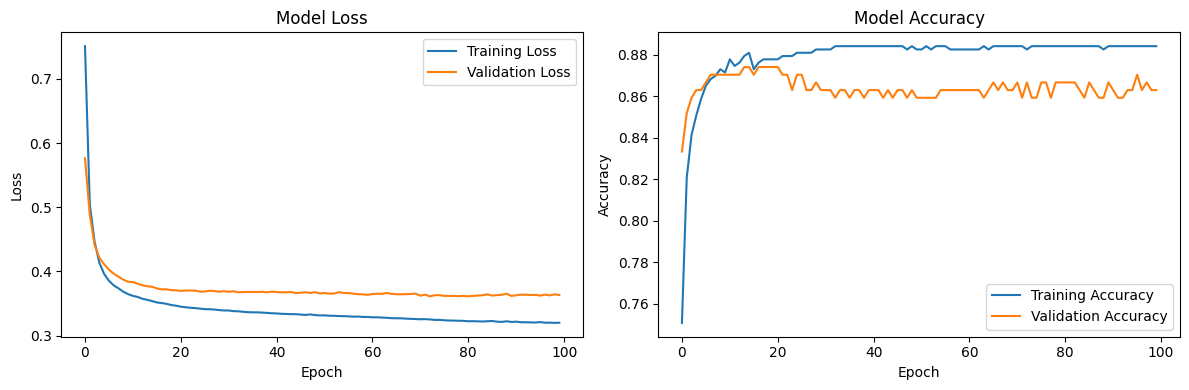

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
y_pred_pretrained = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report (Pretrained):\n", classification_report(y_test, y_pred_pretrained))
print("Confusion Matrix (Pretrained):\n", confusion_matrix(y_test, y_pred_pretrained))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report (Pretrained):
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       129
           1       0.88      0.86      0.87       141

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

Confusion Matrix (Pretrained):
 [[112  17]
 [ 20 121]]
